In [1]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Time    :   20/05/2024 15:02:44
@Author  :   Marty 
'''

# Pulizia
from IPython import get_ipython
get_ipython().magic('clear')
get_ipython().magic('reset -f')
#Librerie
from IPython.display import display, Markdown
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_15407/3871137735.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('clear')
/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_15407/3871137735.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -f')


- La simulazione OF è stata modificata opportunamente in modo da avere il medesimo 
  coefficiente di diffusione corrispondente al 1 in sciantix + con il fission yield 
  relativo allo xenon espresso in moli. 
- Per far tornare questo caso bisogna andare in MainVariables.cpp e avere 1000 step. 
- Gli errori che venivano prima con la versione di sciantix 1.0 erano: 
  - HF vs analitico (end) = 0.48%
  - SCIANTIX vs analitico (end) = 0.0898%
  - SCIANTIX vs HF (end)  = 0.39%
  - SCIANTIX vs HF (max)  = 0.40%
  
- Gli errori che vengono adesso con sciantix 2.0 e 5 basi: 
  - HF vs analitico (end) = 0.48%
  - SCIANTIX vs analytic (end) = 0.51%
  - SCIANTIX vs HF (end) = 0.0239% 
  - SCIANTIX vs HF (max)  = 0.034% (si ha all'inizio)

- Gli errori che vengono adesso con sciantix 2.0 e 10 basi:
  - HF vs analitico (end) = 0.48%
  - SCIANTIX vs analytic (end) = 0.51%
  - SCIANTIX vs HF (end) = 0.0239%
  - SCIANTIX vs HF (max) = 0.0239% (prende meglio l'inizio)

### **input settings**
- resolution rate ($b$)= 0 (constant value) 
- trapping rate ($g$)= 99 (valore nullo)

questi settings li trovo in **SetSystem.C**

In [2]:
boltzmann = 1.380651e-23
temperature = 1200
fission_rate = 3e19
fission_yield = 0.24
radius=5e-6
#Turnbull case 1
d1 = 7.6e-10 * np.exp(-4.86e-19 / (boltzmann * temperature));
d2 = 4.0 * 1.41e-25 * np.sqrt(fission_rate) * np.exp(-1.91e-19 / (boltzmann* temperature));
d3 = 8.0e-40 * fission_rate;
D=d1+d2+d3
solution=(fission_yield*fission_rate*radius**2)/(15*D)

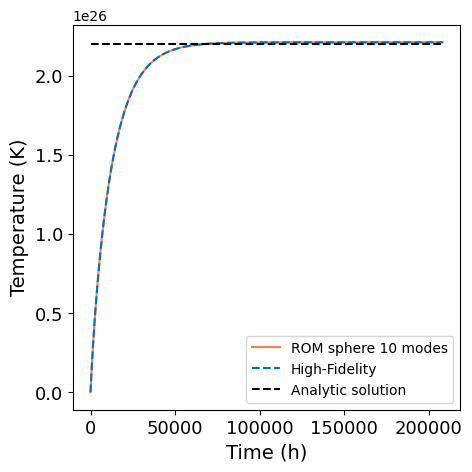

In [11]:
data = pd.read_table("output.txt")

high_fidelity=np.loadtxt("volFieldValue.dat")
timeOF=high_fidelity[:,0]/3600 #hour
xeOF=high_fidelity[:,1]*6.022e23

fig, (ax1) = plt.subplots(1,  figsize=(5,5)) 
ax1.plot(data['Time (h)'],data['Xe in grain (at/m3)'], color='#FF7F50', label='ROM sphere 10 modes', linewidth=1.5)
ax1.plot(timeOF,xeOF, '--',label='High-Fidelity', color='#0072bd', linewidth=1.5)
ax1.hlines(solution,0, data['Time (h)'].iloc[-1],label='Analytic solution', color='#050402', linewidth=1.5, linestyle='--')

ax1.set_xlabel('Time (h)',fontsize=14)
ax1.set_ylabel('Temperature (K)',fontsize=14)
ax1.tick_params(axis="y", labelsize=13)
ax1.tick_params(axis="x", labelsize=13)
ax1.legend()
plt.savefig(os.path.join('Xenon concentration.pdf'), bbox_inches='tight')


Text(0, 0.5, 'Relative error (%)')

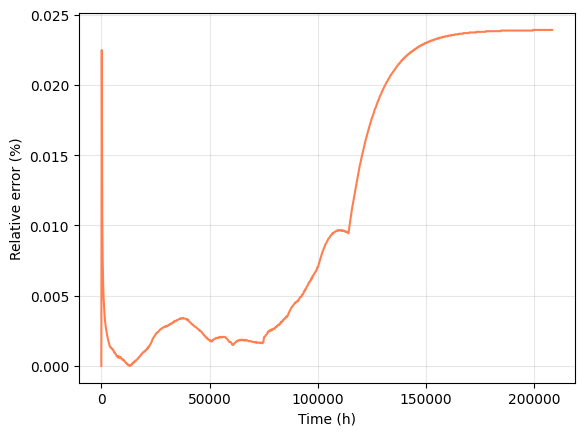

In [14]:
error = np.zeros(1001)
for i in range (1, 1001): 
    error[i]= (abs(xeOF[i]- data['Xe in grain (at/m3)'][i])/xeOF[i])*100 

plt.plot(figsize=[5,5])
plt.plot(timeOF,error, color='#FF7F50', linewidth=1.5)
plt.grid(which='both', alpha=0.3)
plt.xlabel('Time (h)')
plt.ylabel('Relative error (%)')
#plt.savefig("Error.pdf", bbox_inches="tight")

In [19]:
err= (abs(xeOF[-1]-solution)/xeOF[-1])*100
print(F'HF vs analytic (end)= {err} (%).')
err= (abs(data['Xe in grain (at/m3)'].iloc[-1]-solution)/data['Xe in grain (at/m3)'].iloc[-1])*100
print(F'SCIANTIX vs analytic (end)= {err} (%).')
err= (abs(xeOF[-1]-data['Xe in grain (at/m3)'].iloc[-1])/data['Xe in grain (at/m3)'].iloc[-1])*100
print(F'SCIANTIX vs HF (end)= {err} (%).')
print(F'Maximum error between SCIANTIX and HF = {max(error)} (%).')


HF vs analytic (end)= 0.48395447757455257 (%).
SCIANTIX vs analytic (end)= 0.5077452975075362 (%).
SCIANTIX vs HF (end)= 0.023906516590455264 (%).
Maximum error between SCIANTIX and HF = 0.02391223317244578 (%).
